# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [46]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [47]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [48]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our Beautiful Soup looks like. As you can see, the content is the same with our get_url object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness porpose we slice it only 500 character.

In [49]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(please change this markdown with your explanation)*

In [50]:
#take the key that points to the contents of the table without a table head or without the title of each column
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2024-05-09">
    May 9, 2024
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2024-05-09">
    2024-5-9
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     16,027
    </span>
   </span>
   <span class="n">
    <span class="nowrap">



Next, we need to find the row length.

In [51]:
td = table.find('td')
td

<td>
<a class="w" href="/exchange-rate-history/usd-idr-2024-05-09">May 9, 2024</a>
<a class="n" href="/exchange-rate-history/usd-idr-2024-05-09">2024-5-9</a>
</td>

In [52]:
#row_length = len(td)
#row_length --> hasilnya 5

In [53]:
#Calculate the length of the row data
tr = table.find_all('tr')
tr[0]

<tr>
<td>
<a class="w" href="/exchange-rate-history/usd-idr-2024-05-09">May 9, 2024</a>
<a class="n" href="/exchange-rate-history/usd-idr-2024-05-09">2024-5-9</a>
</td>
<td>
<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,027</span></span>
<span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,027</span></span>
</td>
</tr>

In [54]:
table.find_all('a', attrs= {'class':'w'})[1].text

'May 8, 2024'

In [55]:
table.find_all('span', attrs= {'class':'w'})[1].text

'$1 = Rp16,075'

In [56]:
#Menghitung jumlah row (tidak bisa menggunakan data 'tr' karena ada row untuk ads dan bottom data)
#Jika menggunakan data tr maka saat looping akan error (list index out of range)
row = table.find_all('span', attrs= {'class':'w'})
row_length = len(row)
row_length

129

In [57]:
#Mencari data tanggal
a_class=table.find('a', attrs={'class':'n'})
a_class

<a class="n" href="/exchange-rate-history/usd-idr-2024-05-09">2024-5-9</a>

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [58]:
temp = []  # Initiating a tuple

for i in range(0, row_length):

    # Scraping process
    #get date
    date = table.find_all('a', attrs= {'class':'w'})[i].text
   
    #get value
    idr = table.find_all('span', attrs= {'class':'w'})[i].text
 
    temp.append((date,idr))

temp

[('May 9, 2024', '$1 = Rp16,027'),
 ('May 8, 2024', '$1 = Rp16,075'),
 ('May 7, 2024', '$1 = Rp16,072'),
 ('May 6, 2024', '$1 = Rp16,042'),
 ('May 3, 2024', '$1 = Rp15,969'),
 ('May 2, 2024', '$1 = Rp16,095'),
 ('May 1, 2024', '$1 = Rp16,194'),
 ('April 30, 2024', '$1 = Rp16,263'),
 ('April 29, 2024', '$1 = Rp16,241'),
 ('April 26, 2024', '$1 = Rp16,241'),
 ('April 25, 2024', '$1 = Rp16,193'),
 ('April 24, 2024', '$1 = Rp16,212'),
 ('April 23, 2024', '$1 = Rp16,143'),
 ('April 22, 2024', '$1 = Rp16,238'),
 ('April 19, 2024', '$1 = Rp16,218'),
 ('April 18, 2024', '$1 = Rp16,210'),
 ('April 17, 2024', '$1 = Rp16,243'),
 ('April 16, 2024', '$1 = Rp16,303'),
 ('April 15, 2024', '$1 = Rp16,083'),
 ('April 12, 2024', '$1 = Rp16,118'),
 ('April 11, 2024', '$1 = Rp16,011'),
 ('April 10, 2024', '$1 = Rp16,001'),
 ('April 9, 2024', '$1 = Rp15,892'),
 ('April 8, 2024', '$1 = Rp15,912'),
 ('April 5, 2024', '$1 = Rp15,888'),
 ('April 4, 2024', '$1 = Rp15,896'),
 ('April 3, 2024', '$1 = Rp15,942'),


Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [59]:
import pandas as pd

data = pd.DataFrame(temp, columns= ('date', 'idr'))
data.head()

,date,idr
0,"May 9, 2024","$1 = Rp16,027"
1,"May 8, 2024","$1 = Rp16,075"
2,"May 7, 2024","$1 = Rp16,072"
3,"May 6, 2024","$1 = Rp16,042"
4,"May 3, 2024","$1 = Rp15,969"


### Data Cleansing

(please change this markdown with your explanation of what you do for data wrangling)

In [60]:
data.dtypes

date    object
idr     object
dtype: object

In [61]:
data['date'] = data['date'].astype('datetime64[ns]')

In [62]:
data['idr'] = data['idr'].str.replace("$1" , "")
data['idr'] = data['idr'].str.replace("=" , "")
data['idr'] = data['idr'].str.replace("Rp" , "")
data['idr'] = data['idr'].str.replace("," , "")

In [63]:
data.head()

,date,idr
0,2024-05-09,16027
1,2024-05-08,16075
2,2024-05-07,16072
3,2024-05-06,16042
4,2024-05-03,15969


In [64]:
data['idr'] = data['idr'].astype('int64')

In [65]:
data.dtypes

date    datetime64[ns]
idr              int64
dtype: object

In [66]:
#Before make the plot, we should make date as an index
data=data.set_index('date')

### Data Visualization

(please change this markdown with your explanation of what you do for data wrangling)

<Axes: xlabel='date'>

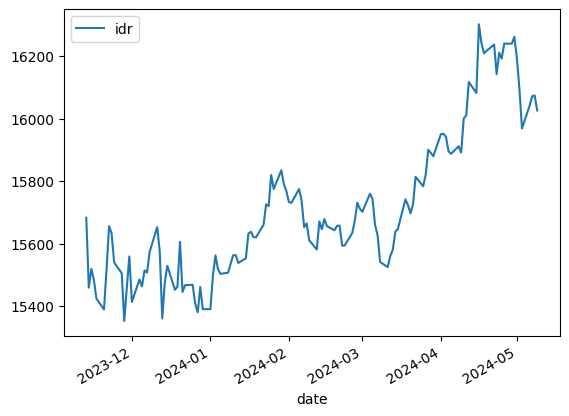

In [67]:
data.plot()

Insight: 
exchange rate start to increase on january 2024, maybe it's caused by the election, as we can see it when 2019 election, before election conducted the rupiah was weakened buat after the annoucement of the election results, rupiah start to strengthen again, proven by the decline of the exchange rate.
Other factors that might be influenced are global economic condition and US economic condition

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

## Analysis

(Put your analysis and conclusion here.)

Insight: 
Exchange rate start to increase on january 2024, maybe it's caused by the election, as we can see it when 2019 election, before election conducted the rupiah was weakened buat after the annoucement of the election results, rupiah start to strengthen again, proven by the decline of the exchange rate.
Other factors that might be influenced are global economic condition and US economic condition.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.